<a href="https://colab.research.google.com/github/jaskaran2002/102103296-SESS_LE1/blob/main/102103296_JaskaranSingh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Jaskaran Singh**  
Email: `jsingh7_be21@thapar.edu`  
Roll No: **102103296**  
Group: **4CO11**  
Start Timestamp: 20240911-0830  

## Question

Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.

# Summarized Paper

The document describes the Speech Commands dataset, designed for training keyword-spotting
systems. It focuses on real-world audio, capturing single words from diverse speakers using common
microphones. The dataset includes 35 words and background noise, with a focus on reproducible
metrics and quality control. It aims to train speaker-independent models and foster collaboration.
This dataset aims to meet the special needs around building and testing on-device models, to enable model authors to demonstrate the accuracy of their architectures using metrics that are comparable to other models.

# Data Analysis

In [ ]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!mkdir data
!tar -xvzf speech_commands_v0.02.tar.gz -C ./data

In [ ]:
import os
import wave
import numpy as np
import pandas as pd
import hashlib
import re

dataset_path = "./data"

file_stats = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            word_label = os.path.basename(root)
            speaker_id = file.split('_')[0]
            with wave.open(file_path, 'r') as wav_file:
                sample_rate = wav_file.getframerate()
                num_frames = wav_file.getnframes()
                duration = num_frames / float(sample_rate)
                n_channels = wav_file.getnchannels()

            file_stats.append({
                'file_path': file_path,
                'word_label': word_label,
                'speaker_id': speaker_id,
                'duration': duration,
                'sample_rate': sample_rate,
                'num_channels': n_channels,
                'num_frames': num_frames,
            })

df = pd.DataFrame(file_stats)
print("original data")
print(df.head())

original data

                         file_path word_label speaker_id  duration  \

0  ./data/no/7ea032f3_nohash_2.wav         no   7ea032f3       1.0   

1  ./data/no/2356b88d_nohash_3.wav         no   2356b88d       1.0   

2  ./data/no/5fadb538_nohash_2.wav         no   5fadb538       1.0   

3  ./data/no/ab46af55_nohash_3.wav         no   ab46af55       1.0   

4  ./data/no/611d2b50_nohash_1.wav         no   611d2b50       1.0   



   sample_rate  num_channels  num_frames  

0        16000             1       16000  

1        16000             1       16000  

2        16000             1       16000  

3        16000             1       16000  

4        16000             1       16000  


In [ ]:


def describe_data(df):
    unique_words = df['word_label'].nunique()
    word_counts = df['word_label'].value_counts()
    unique_speakers = df['speaker_id'].nunique()
    duration_stats = df['duration'].describe()
    sample_rate_stats = df['sample_rate'].describe()
    channel_distribution = df['num_channels'].value_counts()


    print(f"Number of unique words: {unique_words}")
    print(f"Number of unique speakers: {unique_speakers}")
    print("\nWord Counts:\n", word_counts)
    print("\nAudio Duration Statistics:\n", duration_stats)
    print("\nSample Rate Statistics:\n", sample_rate_stats)
    print("\nChannel Distribution:\n", channel_distribution)


describe_data(df)


Number of unique words: 36

Number of unique speakers: 2624



Word Counts:

 word_label

zero                  8104

five                  8104

yes                   8088

seven                 7996

no                    7882

nine                  7868

down                  7834

one                   7780

go                    7760

two                   7760

stop                  7744

six                   7720

on                    7690

left                  7602

eight                 7574

right                 7556

off                   7490

four                  7456

three                 7454

up                    7446

dog                   4256

wow                   4246

house                 4226

marvin                4200

bird                  4128

happy                 4108

cat                   4062

sheila                4044

bed                   4028

tree                  3518

backward              3328

visual                3184

follow        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


word_distribution = df['word_label'].value_counts()


avg_duration_per_word = df.groupby('word_label')['duration'].mean()


speaker_distribution = df['speaker_id'].value_counts()


sns.set(style="whitegrid")



[NeMo W 2024-09-11 07:53:33 nemo_logging:349] <ipython-input-32-a1721a4c8ca3>:3: FutureWarning: 

    

    Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

    

      sns.barplot(x=word_distribution.index, y=word_distribution.values, palette="viridis")

    


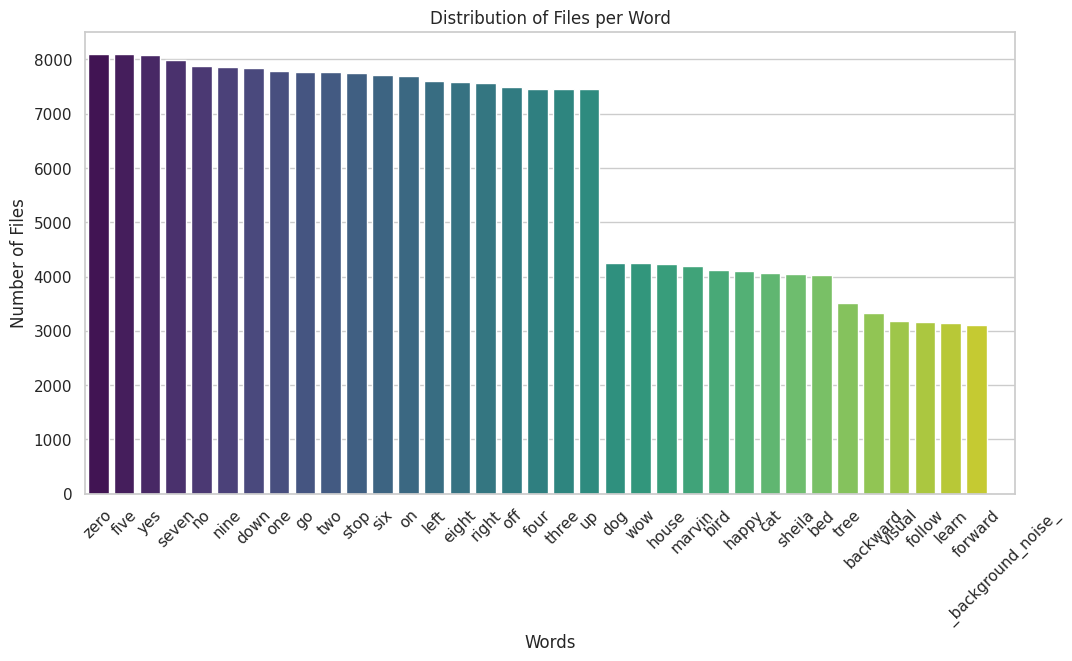

In [ ]:
#Visualizing the Distribution of Files per Word
plt.figure(figsize=(12, 6))
sns.barplot(x=word_distribution.index, y=word_distribution.values, palette="viridis")
plt.title('Distribution of Files per Word')
plt.ylabel('Number of Files')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

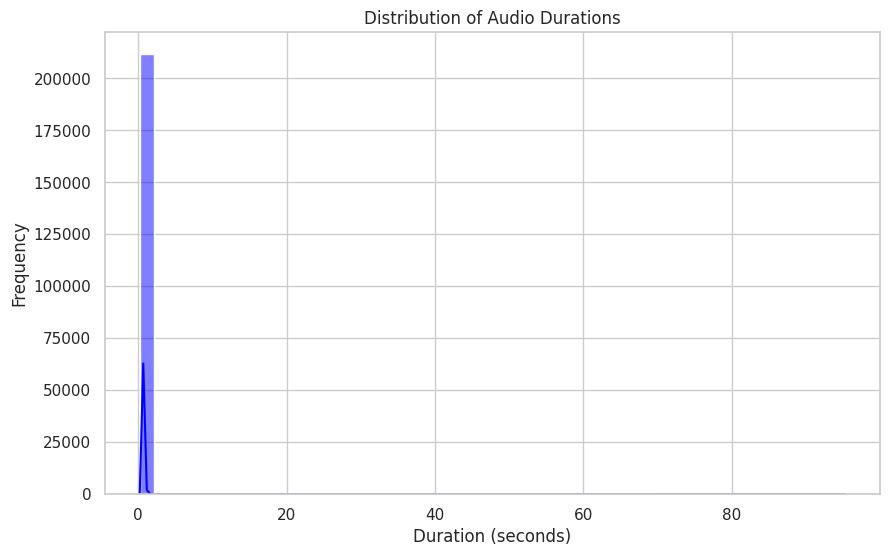

In [ ]:
#Visualizing the Distribution of Audio Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=True, color="blue")
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

[NeMo W 2024-09-11 07:53:36 nemo_logging:349] <ipython-input-34-29aa54d461ea>:4: FutureWarning: 

    

    Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

    

      sns.barplot(x=top_speakers.index, y=top_speakers.values, palette="plasma")

    


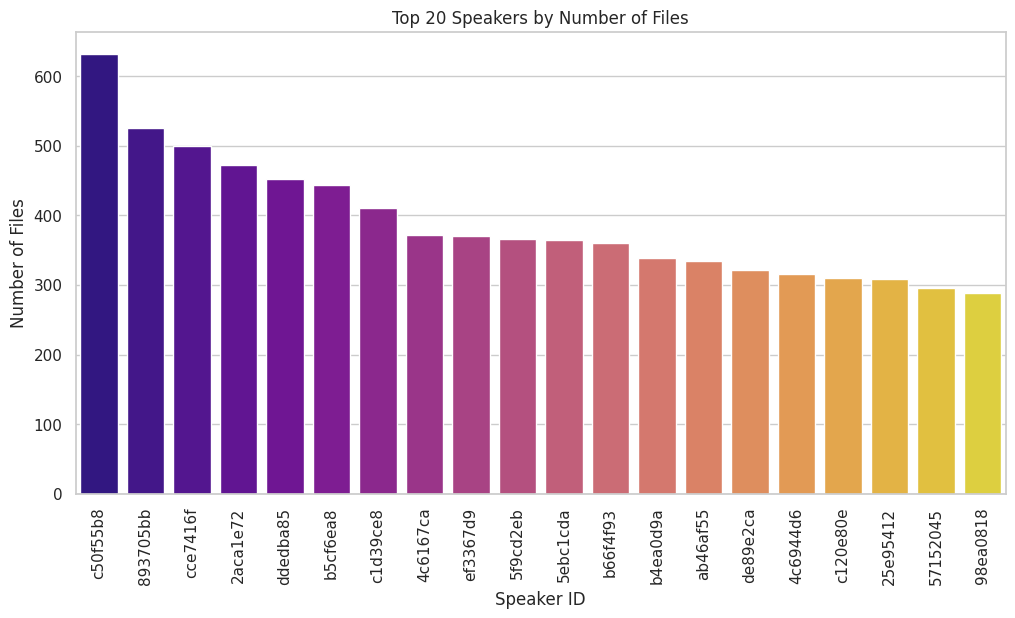

In [ ]:
#Visualizing the Distribution of Files per Speaker
plt.figure(figsize=(12, 6))
top_speakers = speaker_distribution.head(20)  # Displaying top 20 speakers for readability
sns.barplot(x=top_speakers.index, y=top_speakers.values, palette="plasma")
plt.title('Top 20 Speakers by Number of Files')
plt.ylabel('Number of Files')
plt.xlabel('Speaker ID')
plt.xticks(rotation=90)
plt.show()

[NeMo W 2024-09-11 07:53:37 nemo_logging:349] <ipython-input-35-09218dfe5d24>:3: FutureWarning: 

    

    Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

    

      sns.barplot(x=avg_duration_per_word.index, y=avg_duration_per_word.values, palette="magma")

    


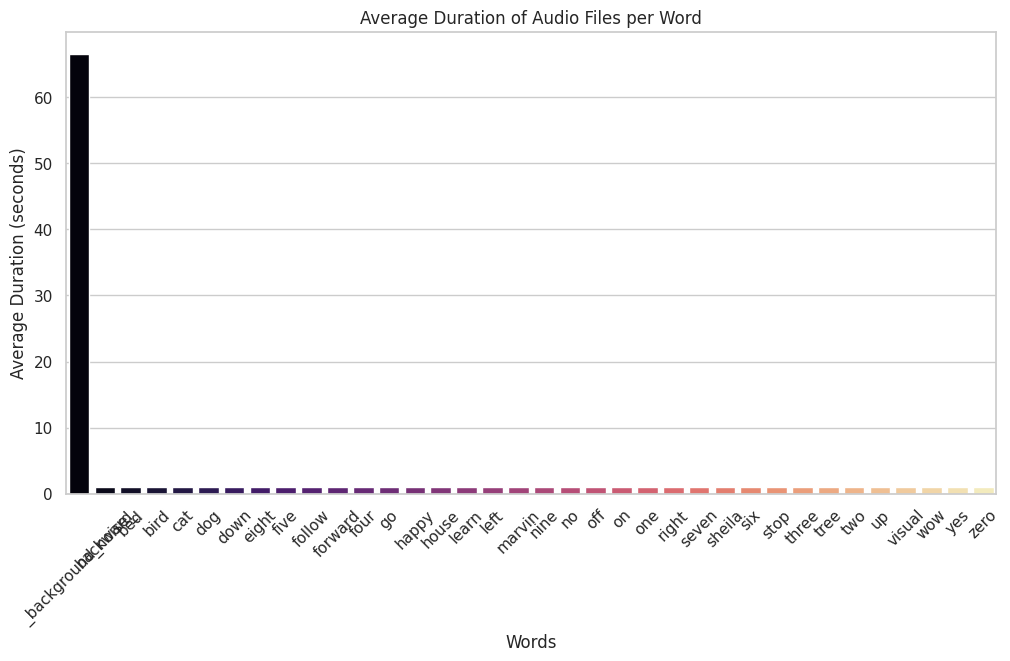

In [ ]:
#Average Duration of Audio Files per Word
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_per_word.index, y=avg_duration_per_word.values, palette="magma")
plt.title('Average Duration of Audio Files per Word')
plt.ylabel('Average Duration (seconds)')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

# Model Training

In [27]:
from tqdm.notebook import tqdm
import os
import librosa
from scipy.io.wavfile import read as wavRead
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, Dropout, Add, Input, Dense, SeparableConv1D, Flatten,GlobalAveragePooling1D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2024-09-12 13:33:33--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.207, 108.177.125.207, 142.250.157.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G  27.2MB/s    in 87s     

2024-09-12 13:35:00 (26.6 MB/s) - ‘speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [ ]:
!mkdir data
!tar -xvzf speech_commands_v0.02.tar.gz -C ./data

In [4]:
!rm -rf ./data/_background_noise_
!rm -rf ./data/LICENSE
!rm -rf ./data/README.md
!mv ./data/testing_list.txt ./testing_list.txt
!mv ./data/validation_list.txt ./validation_list.txt

In [5]:
from tqdm.notebook import tqdm
import os

In [6]:
total_list = []
for label in tqdm(os.listdir('./data')):
  if not os.path.isdir(os.path.join('./data', label)):
    continue
  if (label == "_background_noise_"):
    continue
  for fname in os.listdir(os.path.join('./data', label)):
    if fname.endswith('.wav'):
      total_list.append(f"./data/{label}/{fname}")

  0%|          | 0/36 [00:00<?, ?it/s]

In [7]:
testing_list = []
validation_list = []
with open('./testing_list.txt', 'r') as fin:
  for line in fin:
    testing_list.append('./data/' + line.rstrip())
with open('./validation_list.txt', 'r') as fin:
  for line in fin:
    validation_list.append('./data/' + line.rstrip())

training_list = []
for i in tqdm(total_list):
  if (i not in testing_list) and (i not in validation_list):
    training_list.append(i)


  0%|          | 0/105829 [00:00<?, ?it/s]

In [8]:
import librosa

In [9]:
from scipy.io.wavfile import read as wavRead
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data = []
for i in tqdm(training_list):
  sr, y = wavRead(i)
  y = y.astype(np.dtypes.Float32DType) / (1<<(16-1))

  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=64, n_fft=512, hop_length=160,n_mels=40)
  training_data.append(mfccs)


  0%|          | 0/84843 [00:00<?, ?it/s]

In [ ]:
maxLen = 0
for i in range(len(training_data)):
  test = training_data[i]
  test = np.array(test)
  maxLen = max(maxLen, test.shape[1])
for i in range(len(training_data)):
  training_data[i] =tf.keras.utils.pad_sequences(training_data[i], maxlen = maxLen, value = 0.0)

In [ ]:
training_data = np.array(training_data)

In [ ]:
training_data.shape

(84843, 40, 101)

In [ ]:
np.save('./drive/MyDrive/102103296_speech/training_data.npy', training_data)

In [ ]:
validation_data = []
for i in tqdm(validation_list):
  sr, y = wavRead(i)
  y = y.astype(np.dtypes.Float32DType) / (1<<(16-1))

  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=64, n_fft=512, hop_length=160,n_mels=40)
  validation_data.append(mfccs)
maxLen = 0
for i in range(len(validation_data)):
  test = validation_data[i]
  test = np.array(test)
  maxLen = max(maxLen, test.shape[1])
for i in tqdm(range(len(validation_data))):
  validation_data[i] =tf.keras.utils.pad_sequences(validation_data[i], maxlen = maxLen, value = 0.0)
np.save('./drive/MyDrive/102103296_speech/validation_data.npy', validation_data)

  0%|          | 0/9981 [00:00<?, ?it/s]

  0%|          | 0/9981 [00:00<?, ?it/s]

In [ ]:
labels = os.listdir('./data')
labels.remove('.DS_Store')
labels

['forward',
 'right',
 'yes',
 'no',
 'left',
 'off',
 'happy',
 'learn',
 'four',
 'sheila',
 'marvin',
 'six',
 'stop',
 'nine',
 'tree',
 'two',
 'up',
 'dog',
 'on',
 'go',
 'one',
 'down',
 'follow',
 'eight',
 'three',
 'zero',
 'bird',
 'seven',
 'backward',
 'house',
 'five',
 'cat',
 'wow',
 'bed',
 'visual']

In [11]:
import numpy as np

In [ ]:
labels = np.array(labels)
np.save('./drive/MyDrive/102103296_speech/labels.npy', labels)

In [ ]:
labels = np.load('./drive/MyDrive/102103296_speech/labels.npy')

In [ ]:
labels = list(labels)
train_labels = []
for i in tqdm(training_list):
  t1 = i.split('/')[-2]
  index = labels.index(t1)
  train_labels.append(index)
train_labels = np.array(train_labels)
valid_labels = []
for i in tqdm(validation_list):
  t1 = i.split('/')[-2]
  index = labels.index(t1)
  valid_labels.append(index)
valid_lables = np.array(valid_labels)

  0%|          | 0/84843 [00:00<?, ?it/s]

  0%|          | 0/9981 [00:00<?, ?it/s]

In [ ]:
training_data = np.load('./drive/MyDrive/102103296_speech/training_data.npy')
validation_data = np.load('./drive/MyDrive/102103296_speech/validation_data.npy')

In [ ]:
train_labels = np.load('/kaggle/working/train_labels.npy')
valid_labels = np.load('/kaggle/working/valid_lables.npy')

In [ ]:
train_labels.shape

(84843,)

In [ ]:
training_data = np.transpose(training_data, (0, 2, 1))
validation_data = np.transpose(validation_data, (0, 2, 1))

In [ ]:
training_data.shape

(84843, 101, 40)

In [ ]:
validation_data.shape

(9981, 101, 40)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, Dropout, Add, Input, Dense, SeparableConv1D, Flatten,GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [14]:
def simpleBlock(C,K):
  def layer(x):
    x = Conv1D(C, K, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

  return layer

def block(R = 5, C = 256, K = 33):
  def layer(x):
    residual = x
    for i in range(R):
      x = SeparableConv1D(C, K,padding='same')(x)
      x = BatchNormalization()(x)
      if i != R - 1:
        x = ReLU()(x)

    residual = Conv1D(C, 1,padding='same')(residual)
    x = Add()([x, residual])
    x = ReLU()(x)
    return x

  return layer


def QuartzNet(input_dim, vocab_size, B = 5, R = 5):
  inputs = Input(shape=(None, input_dim))

  x = simpleBlock(256, 33)(inputs)

  residual = x
  x = block(R, 256, 33)(x)
  x = Add()([x, residual])

  residual = x
  x = block(R, 256, 39)(x)
  x = Add()([x, residual])

  residual = x
  x = block(R, 512, 51)(x)
  residual = Conv1D(512, 1)(residual)
  x = Add()([x, residual])

  residual = x
  x = block(R, 512, 63)(x)
  x = Add()([x, residual])

  residual = x
  x = block(R, 512, 75)(x)
  x = Add()([x, residual])

  x = simpleBlock(512,87)(x)

  x = simpleBlock(1024,1)(x)
  # x = Flatten()(x)
  x = GlobalAveragePooling1D()(x)
  # print(x.shape)
  x = Dense(1024)(x)
  x = ReLU()(x)
  x = Dense(512)(x)
  x = ReLU()(x)

  outputs = Dense(vocab_size, activation = 'softmax')(x)
  print(outputs.shape)
  model = Model(inputs=inputs, outputs=outputs)
  return model


In [15]:
quartznet_model = QuartzNet(input_dim=40, vocab_size=35)

(None, 35)


In [16]:
quartznet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = quartznet_model.fit(training_data, train_labels, epochs = 25, batch_size = 32, validation_data=(validation_data, valid_labels))

Epoch 1/25


I0000 00:00:1726131824.617774     241 service.cc:145] XLA service 0x782a4c12b380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726131824.617857     241 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726131824.617864     241 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726131838.353486     241 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2652/2652 ━━━━━━━━━━━━━━━━━━━━ 641s 229ms/step - accuracy: 0.5231 - loss: 1.6125 - val_accuracy: 0.8321 - val_loss: 0.5710
Epoch 2/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 596s 225ms/step - accuracy: 0.8556 - loss: 0.4897 - val_accuracy: 0.8508 - val_loss: 0.5396
Epoch 3/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 595s 225ms/step - accuracy: 0.8954 - loss: 0.3518 - val_accuracy: 0.9118 - val_loss: 0.2986
Epoch 4/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 596s 225ms/step - accuracy: 0.9135 - loss: 0.2894 - val_accuracy: 0.9117 - val_loss: 0.3071
Epoch 5/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 594s 224ms/step - accuracy: 0.9261 - loss: 0.2485 - val_accuracy: 0.9221 - val_loss: 0.2696
Epoch 6/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 595s 224ms/step - accuracy: 0.9343 - loss: 0.2184 - val_accuracy: 0.9267 - val_loss: 0.2881
Epoch 7/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 596s 225ms/step - accuracy: 0.9422 - loss: 0.1966 - val_accuracy: 0.9342 - val_loss: 0.2483
Epoch 8/25
2652/2652 ━━━━━━━━━━━━━━━━━━━━ 595s 224ms/step - accuracy: 0.9

In [ ]:
quartznet_model.save_weights('/kaggle/working/quartznet_weights.weights.h5')

In [ ]:
quartznet_model.save('/kaggle/working/quartznet_model.h5')

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [17]:
import matplotlib.pyplot as plt

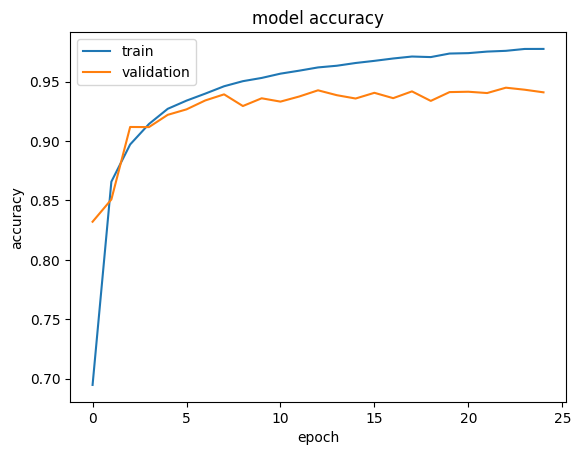

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
quartznet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None, 40)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, None, 256) │    338,176 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None, 256) │      1,024 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, None, 256) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d    │ (None, None, 256) │     74,240 │ re_lu[0][0]       │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 256) │      1,024 │ separable_conv1d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, None, 256) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_1  │ (None, None, 256) │     74,240 │ re_lu_1[0][0]     │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 256) │      1,024 │ separable_conv1d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, None, 256) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_2  │ (None, None, 256) │     74,240 │ re_lu_2[0][0]     │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 256) │      1,024 │ separable_conv1d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, None, 256) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_3  │ (None, None, 256) │     74,240 │ re_lu_3[0][0]     │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 256) │      1,024 │ separable_conv1d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, None, 256) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_4  │ (None, None, 256) │     74,240 │ re_lu_4[0][0]     │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 256) │      1,024 │ separable_conv1d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, None, 256) │     65,792 │ re_lu[0][0]     

 Total params: 93,733,995 (357.57 MB)

 Trainable params: 31,236,643 (119.16 MB)

 Non-trainable params: 24,064 (94.00 KB)

 Optimizer params: 62,473,288 (238.32 MB)

# Model Inference

In [19]:
input_list = testing_list # list of paths of wav files (label/wavfile.wav)


input_data = []
for i in tqdm(input_list):
  sr, y = wavRead(i)
  y = y.astype(np.dtypes.Float32DType) / (1<<(16-1))

  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=64, n_fft=512, hop_length=160,n_mels=40)
  input_data.append(mfccs)

maxLen = 0
for i in range(len(input_data)):
  test = input_data[i]
  test = np.array(test)
  maxLen = max(maxLen, test.shape[1])
for i in range(len(input_data)):
  input_data[i] =tf.keras.utils.pad_sequences(input_data[i], maxlen = maxLen, value = 0.0)


labels = np.load('./drive/MyDrive/102103296_speech/labels.npy')

labels = list(labels)
input_labels = []
for i in tqdm(input_list):
  t1 = i.split('/')[-2]
  index = labels.index(t1)
  input_labels.append(index)
input_labels = np.array(input_labels)


input_data = np.transpose(input_data, (0, 2, 1))

  0%|          | 0/11005 [00:00<?, ?it/s]

  0%|          | 0/11005 [00:00<?, ?it/s]

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model = load_model('/content/drive/MyDrive/102103296_speech/quartznet_model.h5')

Use
```
model.predict(input_data)
```
for prediction



In [26]:
model.evaluate(input_data, input_labels)

344/344 ━━━━━━━━━━━━━━━━━━━━ 1291s 4s/step - accuracy: 0.9235 - loss: 0.3903


[0.3445969521999359, 0.9336665272712708]

# Top-One Error Rate

In [30]:
output = model.predict(input_data)

344/344 ━━━━━━━━━━━━━━━━━━━━ 1275s 4s/step


In [35]:
output_labels = np.argmax(output, -1)

In [34]:
input_labels

array([1, 1, 1, ..., 8, 8, 8])

In [36]:
top_one_errors = 0
count = 0
length = len(output_labels)
for i in range(length):
  if (output_labels[i] != input_labels[i]):
    top_one_errors += 1
  count += 1

top_one_error_rate = top_one_errors / count if count != 0 else 0
print(f"Top-One Error Rate for testing dataset: {top_one_error_rate}")

Top-One Error Rate for testing dataset: 0.06633348477964561
